# Problem statement

In order to improve user retention and lowern churn, the growth team at Robinhood is interested in understanding why and which users withdraw money from their Robinhood account. A user is considered churned when their equity value(amount of money in Robinhood account) falls below 10 dollars for a period of 28 consecutive calendar days or longer after having previously been atleast $10.


#### Steps involved

1. Data Understanding and EDA
2. Data Preparation for Model building
3. Model Building and Evaluation
4. Summary [Answers to the questions]

## 1. Data Understanding and EDA

In [1]:
#!pip install graphviz

In [2]:
#!pip install --upgrade scikit-learn

In [3]:
#conda update -n base -c defaults conda


In [4]:
#conda install -c conda-forge scikit-learn

In [159]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import pytz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler, LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer
from sklearn import set_config
from sklearn.pipeline import make_pipeline



# Suppress warnings from matplotlib
warnings.filterwarnings("ignore")

In [6]:
features_df = pd.read_csv('features_data.csv')
equity_df = pd.read_csv('equity_value_data.csv')

In [657]:
# Inspecting first 5 rows in the features dataframe
features_df.head(20)

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91
5,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,0322b1d744cc89ebbe6ebe70d824d922
6,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,f4cac8c1544b723ddedc9bdba81c64c0
7,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,bdc39d2fc664ef9a5e6713168057f892
8,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,85f2f0f54411b4f3e7a403ba902e7280
9,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,529ddd19dac72d55cde8e633340a9aed


In [658]:
features_df.shape

(5584, 9)

There are 5584 rows and 9 columns in the features dataframe.

In [659]:
# Checking the type of the attributes
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
dtypes: float64(2), object(7)
memory usage: 392.8+ KB


There are no null values in the features dataframe.
time_spent and first_deposit_amount are float features and the remaining features are of object type.

In [660]:
duplicate_rows = len(features_df[features_df.duplicated()])
print('Number of duplicate rows in features_df: {}'.format(duplicate_rows))

Number of duplicate rows in features_df: 0


In [661]:
equity_df.head()

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03


In [662]:
equity_df.shape

(1119158, 3)

There are 1119158 rows and 3 columns in the equity dataframe.

In [663]:
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119158 entries, 0 to 1119157
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1119158 non-null  object 
 1   close_equity  1119158 non-null  float64
 2   user_id       1119158 non-null  object 
dtypes: float64(1), object(2)
memory usage: 25.6+ MB


There are no null values observed in the equity dataframe. close_equity is the only float feature. timestamp and user_id are of object type.

In [664]:
duplicate_rows = len(equity_df[equity_df.duplicated()])
print('Number of duplicate rows in equity_df: {}'.format(duplicate_rows))

Number of duplicate rows in equity_df: 0


## 1.1 Univariate Analysis

Finding the descriptive summary statistics of the features dataframe

In [665]:
features_df.describe()

,time_spent,first_deposit_amount
count,5584.000000,5584.000000
mean,34.509706,633.566805
std,155.080551,2118.323263
min,0.000000,0.000000
25%,2.848908,50.000000
50%,13.474708,100.000000
75%,33.823829,500.000000
max,8788.329450,50000.000000


From the above statistics, 

The distribution of time_spent is skewed to the right. We can see that the mean of time_spent is 34.51 and median is 13.47. Mean value is pulled to its right because of the skewed distribution.

IQR of time_spent defines the spread of data. 
IQR = Q3 - Q1 = 33.823829 - 2.848908 = 30.974921

The distribution of first_deposit_amount is skewed to the right. We can see that the mean of first_deposit_amount is 633.57 and median is 100. Mean value is pulled to its right because of the skewed distribution.

IQR of first_deposit_amount defines the spread of this feature data. 
IQR = Q3 - Q1 = 500 - 50 = 450


<AxesSubplot:>

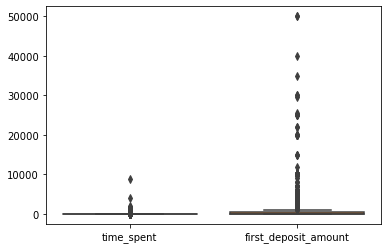

In [666]:
sns.boxplot(data=features_df)

<AxesSubplot:>

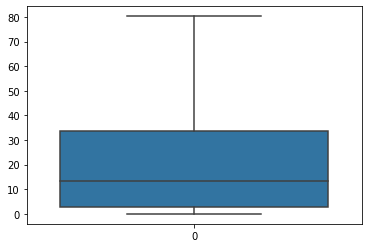

In [667]:
sns.boxplot(data=features_df['time_spent'], 
            showfliers=False)

<AxesSubplot:>

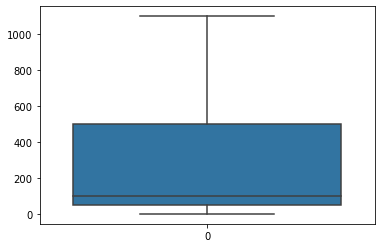

In [668]:
sns.boxplot(data=features_df['first_deposit_amount'], 
            showfliers=False)

In [669]:
equity_df.describe()

,close_equity
count,1.119158e+06
mean,3.976953e+03
std,1.308590e+04
min,1.000000e+01
25%,1.115400e+02
50%,5.787400e+02
75%,2.564560e+03
max,4.789484e+05


Above descriptive summary of close_equity is in scientific notation.

In [670]:
# Applying lambda function for converting values to floating point values with 2 decimal places 
# instead of scientific notation.
equity_df['close_equity'].describe().apply(lambda x: '{0:.2f}'.format(x))

count    1119158.00
mean        3976.95
std        13085.90
min           10.00
25%          111.54
50%          578.74
75%         2564.56
max       478948.41
Name: close_equity, dtype: object

From the above statistics, 

The distribution of close_equity is skewed to the right. We can see that the mean of close_equity is 3976.95 and median is 578.74. Mean value is pulled to its right because of the skewed distribution.

IQR of close_equity defines the spread of this feature data. 
IQR = Q3 - Q1 = 2564.56 - 111.54 = 2453.02

<AxesSubplot:>

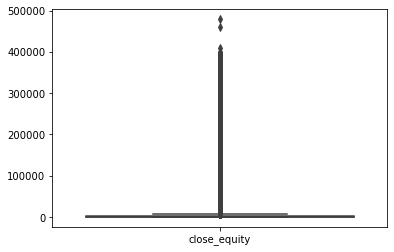

In [671]:
sns.boxplot(data=equity_df)

<AxesSubplot:>

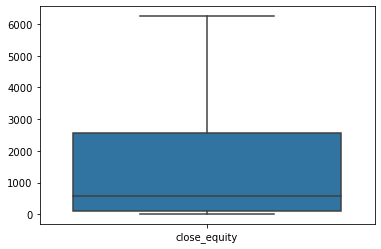

In [672]:
sns.boxplot(data=equity_df, 
            showfliers=False)

In [674]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
dtypes: float64(2), object(7)
memory usage: 392.8+ KB


In [675]:
# Percentage distribution of risk_tolerance
risk_tol_distribution = features_df['risk_tolerance'].value_counts(normalize=True)
risk_tol_distribution

high_risk_tolerance    0.638610
med_risk_tolerance     0.318589
low_risk_tolerance     0.042801
Name: risk_tolerance, dtype: float64

Most of the users(around 64%) reported that they had high risk tolerance.<br>
Around 32% of the users reported that they had medium risk tolerance.<br>
Remaining 4% reported that they had low risk tolerance.

<AxesSubplot:title={'center':'Frequency distribution of risk tolerance'}, xlabel='risk_tolerance', ylabel='count'>

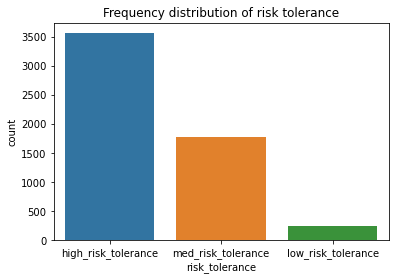

In [676]:
plt.figure(figsize=(4,2))
plt.title('Frequency distribution of risk tolerance')
sns.countplot(data=features_df, 
              x='risk_tolerance')

([<matplotlib.patches.Wedge at 0x1aa11b4d7c0>,
 [Text(-0.4640073872366141, 0.9973450479096244, 'high_risk_tolerance'),
  Text(0.32611684271249897, -1.0505464315770299, 'med_risk_tolerance'),
  Text(1.090070816054314, -0.1474639480913288, 'low_risk_tolerance')],
 [Text(-0.2530949384926986, 0.5440063897688859, '64%'),
  Text(0.17788191420681762, -0.5730253263147436, '32%'),
  Text(0.5945840814841712, -0.08043488077708842, '4%')])

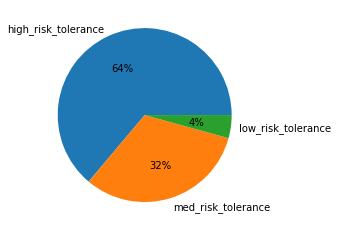

In [677]:
plt.pie(risk_tol_distribution, 
        labels=risk_tol_distribution.index, 
        autopct='%.0f%%')

In [678]:
# Percentage distribution of risk_tolerance
inv_exp_dist = features_df['investment_experience'].value_counts(normalize=True)
inv_exp_dist

limited_investment_exp      0.461676
no_investment_exp           0.321633
good_investment_exp         0.203080
extensive_investment_exp    0.013610
Name: investment_experience, dtype: float64

Around 46% of the users had limited investment experience.<br>
Around 32% of the users had no experience.<br>
Around 20% of the users had good investment experience.<br>
Around 1% of the users had extensive experience.<br>

([<matplotlib.patches.Wedge at 0x1aa11c13df0>,
 [Text(0.1321177815585536, 1.0920370377400423, 'limited_investment_exp'),
  Text(-0.7899733893419972, -0.7654685128282662, 'no_investment_exp'),
  Text(0.8244342469850349, -0.728222611842161, 'good_investment_exp'),
  Text(1.098994613591798, -0.047019562909652465, 'extensive_investment_exp')],
 [Text(0.07206424448648377, 0.595656566040023, '46%'),
  Text(-0.4308945760047257, -0.4175282797245088, '32%'),
  Text(0.4496914074463826, -0.3972123337320878, '20%'),
  Text(0.599451607413708, -0.025647034314355888, '1%')])

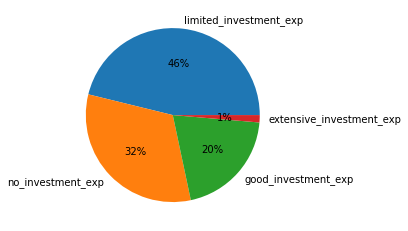

In [679]:
plt.pie(inv_exp_dist, 
        labels=inv_exp_dist.index, 
        autopct='%.0f%%')

In [680]:
# Percentage distribution of liquidity_needs
liq_needs_dist = features_df['liquidity_needs'].value_counts(normalize=True)
liq_needs_dist

very_important_liq_need        0.755193
somewhat_important_liq_need    0.198603
not_important_liq_need         0.046203
Name: liquidity_needs, dtype: float64

Around 76% of the users reported that the importance of liquidity needs is high.<br>
Around 20% of the users reported that the importance of liquidity needs is medium.<br>
Around 4% of the users reported that the liquidity needs are not important to them.<br>

([<matplotlib.patches.Wedge at 0x1aa11d084c0>,
 [Text(-0.7904039193191645, 0.7650239501642441, 'very_important_liq_need'),
  Text(0.6714364235780627, -0.8713054166552051, 'somewhat_important_liq_need'),
  Text(1.0884322676973726, -0.15910750653302067, 'not_important_liq_need')],
 [Text(-0.4311294105377261, 0.4172857909986785, '76%'),
  Text(0.3662380492243978, -0.47525749999374817, '20%'),
  Text(0.5936903278349304, -0.08678591265437491, '5%')])

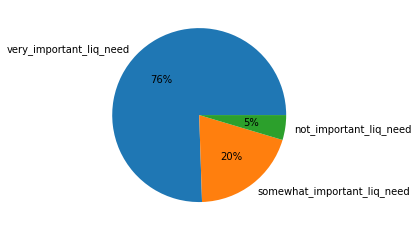

In [681]:
plt.pie(liq_needs_dist, 
        labels=liq_needs_dist.index, 
        autopct='%.0f%%')

In [682]:
# Percentage distribution of platform
platform_dist = features_df['platform'].value_counts(normalize=True)
platform_dist

iOS        0.635745
Android    0.273818
both       0.090437
Name: platform, dtype: float64

Around 64% of the users used iOS.<br>
Around 27% of the users used Android.<br>
Around 9% of the users used both.<br>

([<matplotlib.patches.Wedge at 0x1aa11023b50>,
 [Text(-0.45501095743288983, 1.001481417009824, 'iOS'),
  Text(0.15604511650861078, -1.0888755308178315, 'Android'),
  Text(1.0559007703782508, -0.30834001218560125, 'both')],
 [Text(-0.24818779496339444, 0.5462625910962676, '64%'),
  Text(0.08511551809560587, -0.5939321077188171, '27%'),
  Text(0.5759458747517731, -0.16818546119214614, '9%')])

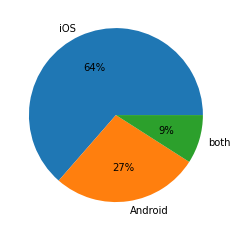

In [683]:
plt.pie(platform_dist, 
        labels=platform_dist.index, 
        autopct='%.0f%%')

In [684]:
# Percentage distribution of instrument_type_first_traded
instrument_dist = features_df['instrument_type_first_traded'].value_counts(normalize=True)
instrument_dist

stock       0.864434
etp         0.068589
adr         0.035279
mlp         0.009850
reit        0.009850
cef         0.003582
wrt         0.002865
0           0.002328
rlt         0.001612
lp          0.001433
tracking    0.000179
Name: instrument_type_first_traded, dtype: float64

Around 86% of the users used stock for their first trading.<br>

In [685]:
# Replacing the category "0" with "unknown"
x = features_df['instrument_type_first_traded']
x = x.str.replace("0", "unknown")
x.value_counts(normalize=True)

stock       0.864434
etp         0.068589
adr         0.035279
mlp         0.009850
reit        0.009850
cef         0.003582
wrt         0.002865
unknown     0.002328
rlt         0.001612
lp          0.001433
tracking    0.000179
Name: instrument_type_first_traded, dtype: float64

<AxesSubplot:xlabel='instrument_type_first_traded', ylabel='count'>

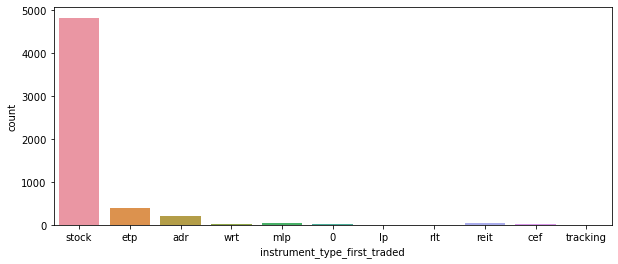

In [686]:
plt.figure(figsize=(10,4))
sns.countplot(data=features_df,
              x=features_df['instrument_type_first_traded'])

In [687]:
# Percentage distribution of time_horizon
time_horizon_dist = features_df['time_horizon'].value_counts(normalize=True)
time_horizon_dist

short_time_horizon    0.507342
long_time_horizon     0.328259
med_time_horizon      0.164398
Name: time_horizon, dtype: float64

Around 51% of the users reported short time investors.<br>
Around 33% of the users reported long time investors.<br>
Around 16% of the users reported medium time investors.<br>

([<matplotlib.patches.Wedge at 0x1aa11105340>,
 [Text(-0.025371256498277234, 1.0997073698687752, 'short_time_horizon'),
  Text(-0.5209908414067939, -0.9687974727311386, 'long_time_horizon'),
  Text(0.9565232076382649, -0.5431973428224817, 'med_time_horizon')],
 [Text(-0.013838867180878489, 0.5998403835647863, '51%'),
  Text(-0.28417682258552385, -0.5284349851260756, '33%'),
  Text(0.5217399314390535, -0.2962894597213536, '16%')])

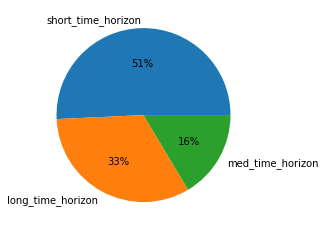

In [688]:
plt.pie(time_horizon_dist, 
        labels=time_horizon_dist.index, 
        autopct='%.0f%%')

In [689]:
print('Number of unique user ids in the features dataframe: {}'.\
      format(features_df['user_id'].nunique()))

Number of unique user ids in the features dataframe: 5584


In [690]:
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119158 entries, 0 to 1119157
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1119158 non-null  object 
 1   close_equity  1119158 non-null  float64
 2   user_id       1119158 non-null  object 
dtypes: float64(1), object(2)
memory usage: 25.6+ MB


In [691]:
equity_df['timestamp'] = pd.to_datetime(equity_df['timestamp'])

In [692]:
equity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119158 entries, 0 to 1119157
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   timestamp     1119158 non-null  datetime64[ns, UTC]
 1   close_equity  1119158 non-null  float64            
 2   user_id       1119158 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 25.6+ MB


In [693]:
# Check if any timezone information is present in the timestamp column
has_timezone = equity_df['timestamp'].dt.tz is not None
print("Does timestamp column contains timezone information? {}".\
      format("Yes" if has_timezone else "No"))

Does timestamp column contains timezone information? Yes


In [694]:
# Converting timestamp feature to datetime64 type in pandas as the information given 
# is on day basis.
equity_df['timestamp'] = pd.to_datetime(equity_df['timestamp']).dt.tz_convert(None)

In [695]:
equity_df.sort_values(['user_id', 'timestamp'], inplace=True)

In [696]:
equity_df.head()

,timestamp,close_equity,user_id
505994,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d
505995,2016-08-19,1173.5640,0012db34aa7b083f5714e7831195e54d
505996,2016-08-22,1253.0597,0012db34aa7b083f5714e7831195e54d
505997,2016-08-23,1252.9050,0012db34aa7b083f5714e7831195e54d
505998,2016-08-24,1262.1360,0012db34aa7b083f5714e7831195e54d


#### Assumptions made:

For some users like 002e4653171ddc61c3cd30603cd7bd3e, we see the equity values in equity_data.csv from 2017-02-16. We are not sure whether 
1. the user churned before 2017-02-16 because there are no equity values before 2017-02-16 or
2. the user created their robinhood account on 2017-02-16 and hence we see equity values from 2017-02-16.

We made the second assumption.

In [697]:
user_account_df = equity_df.groupby('user_id')['timestamp'].agg(['min'])
user_account_df.reset_index(inplace=True)
user_account_df = user_account_df.rename(columns={'min': 'account_start_date'})

In [698]:
user_account_df.head()

,user_id,account_start_date
0,0012db34aa7b083f5714e7831195e54d,2016-08-18
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18


In [699]:
result_dict = user_account_df.groupby('user_id').apply(\
    lambda x: x['account_start_date'].values).to_dict()

In [700]:
len(result_dict)

5584

In [701]:
# Find unique user_id's
users = list(equity_df['user_id'].unique())

In [702]:
data = []
for user in users:
    # Account created date
    #start_date = '2016-08-16' # as per the problem statement
    start_date = np.datetime_as_string(result_dict[user][0]).split('T')[0] # Account created date
    end_date = '2017-08-18' # as per the problem statement

   
    # Generate a list of dates ranging from the given start and end dates
    dates = pd.date_range(start=start_date, 
                          end=end_date,
                          freq='D')

    user_data = pd.DataFrame({'user_id': user, 
                              'timestamp': dates})
    data.append(user_data)
    
new_df = pd.concat(data, ignore_index=True)

In [703]:
new_df.head()

,user_id,timestamp
0,0012db34aa7b083f5714e7831195e54d,2016-08-18
1,0012db34aa7b083f5714e7831195e54d,2016-08-19
2,0012db34aa7b083f5714e7831195e54d,2016-08-20
3,0012db34aa7b083f5714e7831195e54d,2016-08-21
4,0012db34aa7b083f5714e7831195e54d,2016-08-22


In [704]:
new_df[new_df['user_id'] == '00440034cc4152bfb01b30f5c381c4e3']

,user_id,timestamp
1459,00440034cc4152bfb01b30f5c381c4e3,2016-12-30
1460,00440034cc4152bfb01b30f5c381c4e3,2016-12-31
1461,00440034cc4152bfb01b30f5c381c4e3,2017-01-01
1462,00440034cc4152bfb01b30f5c381c4e3,2017-01-02
1463,00440034cc4152bfb01b30f5c381c4e3,2017-01-03
...,...,...
1686,00440034cc4152bfb01b30f5c381c4e3,2017-08-14
1687,00440034cc4152bfb01b30f5c381c4e3,2017-08-15
1688,00440034cc4152bfb01b30f5c381c4e3,2017-08-16
1689,00440034cc4152bfb01b30f5c381c4e3,2017-08-17


In [705]:
merged_df = new_df.merge(equity_df, 
                         how='left', 
                         on=['user_id', 'timestamp'])
merged_df.head()

,user_id,timestamp,close_equity
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,1211.6055
1,0012db34aa7b083f5714e7831195e54d,2016-08-19,1173.5640
2,0012db34aa7b083f5714e7831195e54d,2016-08-20,NaN
3,0012db34aa7b083f5714e7831195e54d,2016-08-21,NaN
4,0012db34aa7b083f5714e7831195e54d,2016-08-22,1253.0597


In [706]:
# Find the day
merged_df['day'] = merged_df['timestamp'].apply(lambda x: x.day_name())

In [707]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754506 entries, 0 to 1754505
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   user_id       object        
 1   timestamp     datetime64[ns]
 2   close_equity  float64       
 3   day           object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 66.9+ MB


In [708]:
merged_df.head()

,user_id,timestamp,close_equity,day
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,1211.6055,Thursday
1,0012db34aa7b083f5714e7831195e54d,2016-08-19,1173.5640,Friday
2,0012db34aa7b083f5714e7831195e54d,2016-08-20,NaN,Saturday
3,0012db34aa7b083f5714e7831195e54d,2016-08-21,NaN,Sunday
4,0012db34aa7b083f5714e7831195e54d,2016-08-22,1253.0597,Monday


In [709]:
week_end_list = ['Saturday', 'Sunday']
# Getting the records where the equity value is non-null for weekend.
non_null_equity_weekend = (~merged_df['close_equity'].isna()) & \
                          (merged_df['day'].isin(week_end_list))
merged_df[non_null_equity_weekend]

,user_id,timestamp,close_equity,day


The above implies that there are no equity values present for Saturday and Sunday for all users.

In [710]:
merged_df.isna().sum()

user_id              0
timestamp            0
close_equity    635348
day                  0
dtype: int64

In [711]:
# Missing equity values for Saturday and Sunday
non_null_equity_weekend = (merged_df['close_equity'].isna()) & \
                          (merged_df['day'].isin(week_end_list))
merged_df[non_null_equity_weekend]

,user_id,timestamp,close_equity,day
2,0012db34aa7b083f5714e7831195e54d,2016-08-20,NaN,Saturday
3,0012db34aa7b083f5714e7831195e54d,2016-08-21,NaN,Sunday
9,0012db34aa7b083f5714e7831195e54d,2016-08-27,NaN,Saturday
10,0012db34aa7b083f5714e7831195e54d,2016-08-28,NaN,Sunday
16,0012db34aa7b083f5714e7831195e54d,2016-09-03,NaN,Saturday
...,...,...,...,...
1754486,ffc1e622f3a0b2666f09a6dcb7f27918,2017-07-30,NaN,Sunday
1754492,ffc1e622f3a0b2666f09a6dcb7f27918,2017-08-05,NaN,Saturday
1754493,ffc1e622f3a0b2666f09a6dcb7f27918,2017-08-06,NaN,Sunday
1754499,ffc1e622f3a0b2666f09a6dcb7f27918,2017-08-12,NaN,Saturday


In [712]:
# Missing equity values for days other than Saturday and Sunday
non_null_equity_weekend = (merged_df['close_equity'].isna()) & \
                          (~merged_df['day'].isin(week_end_list))
merged_df[non_null_equity_weekend]

,user_id,timestamp,close_equity,day
18,0012db34aa7b083f5714e7831195e54d,2016-09-05,NaN,Monday
98,0012db34aa7b083f5714e7831195e54d,2016-11-24,NaN,Thursday
130,0012db34aa7b083f5714e7831195e54d,2016-12-26,NaN,Monday
137,0012db34aa7b083f5714e7831195e54d,2017-01-02,NaN,Monday
151,0012db34aa7b083f5714e7831195e54d,2017-01-16,NaN,Monday
...,...,...,...,...
1754291,ffc1e622f3a0b2666f09a6dcb7f27918,2017-01-16,NaN,Monday
1754326,ffc1e622f3a0b2666f09a6dcb7f27918,2017-02-20,NaN,Monday
1754379,ffc1e622f3a0b2666f09a6dcb7f27918,2017-04-14,NaN,Friday
1754424,ffc1e622f3a0b2666f09a6dcb7f27918,2017-05-29,NaN,Monday


We can say that the equity values had gone below $10 in the days for the users which is not provided in equity_data.csv

We assume the equity values to be 9.0(anything below 10) if there are missing dates in the equity dataframe for each user during week days.    


In [713]:
# We impute $9 for missing equity values for week days.
impute_value = 9.0

condition = (merged_df['close_equity'].isna()) & (~merged_df['day'].isin(week_end_list))
merged_df.loc[condition, 'close_equity'] = impute_value


In [714]:
merged_df.isna().sum()

user_id              0
timestamp            0
close_equity    497246
day                  0
dtype: int64

In [715]:
# Getting the records where the equity value is null for weekend.
null_equity_weekend = (merged_df['close_equity'].isna()) & \
                          (merged_df['day'].isin(week_end_list))
merged_df[null_equity_weekend]

,user_id,timestamp,close_equity,day
2,0012db34aa7b083f5714e7831195e54d,2016-08-20,NaN,Saturday
3,0012db34aa7b083f5714e7831195e54d,2016-08-21,NaN,Sunday
9,0012db34aa7b083f5714e7831195e54d,2016-08-27,NaN,Saturday
10,0012db34aa7b083f5714e7831195e54d,2016-08-28,NaN,Sunday
16,0012db34aa7b083f5714e7831195e54d,2016-09-03,NaN,Saturday
...,...,...,...,...
1754486,ffc1e622f3a0b2666f09a6dcb7f27918,2017-07-30,NaN,Sunday
1754492,ffc1e622f3a0b2666f09a6dcb7f27918,2017-08-05,NaN,Saturday
1754493,ffc1e622f3a0b2666f09a6dcb7f27918,2017-08-06,NaN,Sunday
1754499,ffc1e622f3a0b2666f09a6dcb7f27918,2017-08-12,NaN,Saturday


Equity values are missing for Saturday and Sunday as there is no trading happening during weekend. Hence we impute missing equity values for Saturday and Sunday from Friday of the same week.

In [716]:
for user in users:
    each_user_df = merged_df[merged_df['user_id'] == user]
    condition = (each_user_df['close_equity'].isna()) & \
                  (each_user_df['day'].isin(week_end_list))

    # Use forward fill to copy the equity values from Friday to Saturday and Sunday.
    each_user_df['close_equity'] = np.where(condition, 
                                            each_user_df['close_equity'].ffill(), 
                                            each_user_df['close_equity'])
    merged_df[merged_df['user_id'] == user] = each_user_df
    #merged_df.update(each_user_df)

In [717]:
merged_df.isna().sum()

user_id         0
timestamp       0
close_equity    0
day             0
dtype: int64

In [718]:
merged_df[merged_df['close_equity'].isna()]

,user_id,timestamp,close_equity,day


In [719]:
merged_df[merged_df['close_equity'].isna()]

,user_id,timestamp,close_equity,day


In [720]:
print('Are there any duplicate rows in the dataframe: {}'.\
      format(len(merged_df[merged_df.duplicated()])))

Are there any duplicate rows in the dataframe: 0


In [721]:
merged_df.loc[0:10]

,user_id,timestamp,close_equity,day
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,1211.6055,Thursday
1,0012db34aa7b083f5714e7831195e54d,2016-08-19,1173.5640,Friday
2,0012db34aa7b083f5714e7831195e54d,2016-08-20,1173.5640,Saturday
3,0012db34aa7b083f5714e7831195e54d,2016-08-21,1173.5640,Sunday
4,0012db34aa7b083f5714e7831195e54d,2016-08-22,1253.0597,Monday
5,0012db34aa7b083f5714e7831195e54d,2016-08-23,1252.9050,Tuesday
6,0012db34aa7b083f5714e7831195e54d,2016-08-24,1262.1360,Wednesday
7,0012db34aa7b083f5714e7831195e54d,2016-08-25,1226.4250,Thursday
8,0012db34aa7b083f5714e7831195e54d,2016-08-26,1227.9610,Friday
9,0012db34aa7b083f5714e7831195e54d,2016-08-27,1227.9610,Saturday


In [722]:
merged_df['close_equity'].describe().apply(lambda x: '{0:.2f}'.format(x))

count    1754506.00
mean        3554.09
std        12416.00
min            9.00
25%           61.54
50%          437.12
75%         2135.98
max       478948.41
Name: close_equity, dtype: object

In [723]:
merged_df.head()

,user_id,timestamp,close_equity,day
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,1211.6055,Thursday
1,0012db34aa7b083f5714e7831195e54d,2016-08-19,1173.5640,Friday
2,0012db34aa7b083f5714e7831195e54d,2016-08-20,1173.5640,Saturday
3,0012db34aa7b083f5714e7831195e54d,2016-08-21,1173.5640,Sunday
4,0012db34aa7b083f5714e7831195e54d,2016-08-22,1253.0597,Monday


In [724]:
user_churn_count = {}
user_churn_window = {}
user_active_count = {}
user_active_window = {}
user_avg_equity_val = {}

In [725]:
def find_complement_intervals(start, end, subintervals):
    complement_intervals = []
       
    if len(subintervals):
        # Check if the start is greater than the first subinterval's start
        if start < subintervals[0][0]:
            complement_intervals.append([start, subintervals[0][0] - pd.DateOffset(days=1)])

        # Iterate over the subintervals and find the gaps between them
        for i in range(len(subintervals) - 1):
            if subintervals[i][1] < subintervals[i + 1][0]:
                complement_intervals.append([subintervals[i][1] + pd.DateOffset(days=1), 
                                             subintervals[i + 1][0] - pd.DateOffset(days=1)])

        # Check if the end is less than the last subinterval's end
        if end > subintervals[-1][1]:
            complement_intervals.append([subintervals[-1][1] + pd.DateOffset(days=1),
                                         end])
    else:
        complement_intervals.append([start, end])
        
    return complement_intervals


In [726]:
def check_for_overlap(last_start, last_end, curr_start, curr_end):
    if last_start < curr_start <= last_end:
        return True
    return False

def update_window(window, curr_start, curr_end):
    if len(window):
        last_start = window[-1][0]
        last_end = window[-1][1]

        # Check for overlapping intervals before adding
        overlap = check_for_overlap(last_start, last_end, curr_start, curr_end)
        if overlap:
            # Merge intervals
            window[-1][1] = curr_end
            return
        
    window.append([curr_start, curr_end])  

       
def detect_churn_period(each_user_df, window_size):    
    user_id = each_user_df['user_id'].unique()[0]        

    start_date = each_user_df['timestamp'].min()
    end_date = each_user_df['timestamp'].max()

    churn_window = []
    active_window = []

    # Slide window over the dates
    curr_window_start = start_date
    curr_window_end = curr_window_start + pd.DateOffset(days=(window_size - 1))

    # Slide window of size 28 from start_date to end_date
    while curr_window_end <= end_date:

        filtered_df = each_user_df[each_user_df['timestamp'].between(curr_window_start,
                                                                     curr_window_end)]

        all_less_than_10 = (filtered_df['close_equity'] < 10).all()
        if all_less_than_10:
            update_window(churn_window, curr_window_start, curr_window_end)

        curr_window_start = curr_window_start + pd.DateOffset(days=1)
        curr_window_end = curr_window_end + pd.DateOffset(days=1)
    
    user_churn_window[user_id] = churn_window               
    user_churn_count[user_id] = len(churn_window) 

    active_window = find_complement_intervals(start_date,
                                              end_date,
                                              churn_window)
    user_active_window[user_id] = active_window
    user_active_count[user_id] = len(active_window) 

In [727]:
merged_df[(merged_df['user_id'] == '1f1805c0755fdff87a464a8196382c28') & (merged_df['close_equity'] < 10)]

,user_id,timestamp,close_equity,day
209032,1f1805c0755fdff87a464a8196382c28,2016-09-05,9.0,Monday
209112,1f1805c0755fdff87a464a8196382c28,2016-11-24,9.0,Thursday
209144,1f1805c0755fdff87a464a8196382c28,2016-12-26,9.0,Monday
209151,1f1805c0755fdff87a464a8196382c28,2017-01-02,9.0,Monday
209165,1f1805c0755fdff87a464a8196382c28,2017-01-16,9.0,Monday
209200,1f1805c0755fdff87a464a8196382c28,2017-02-20,9.0,Monday
209253,1f1805c0755fdff87a464a8196382c28,2017-04-14,9.0,Friday
209254,1f1805c0755fdff87a464a8196382c28,2017-04-15,9.0,Saturday
209255,1f1805c0755fdff87a464a8196382c28,2017-04-16,9.0,Sunday
209298,1f1805c0755fdff87a464a8196382c28,2017-05-29,9.0,Monday


In [728]:
merged_df[merged_df['user_id'] == '1f1805c0755fdff87a464a8196382c28']

,user_id,timestamp,close_equity,day
209015,1f1805c0755fdff87a464a8196382c28,2016-08-19,1989.61,Friday
209016,1f1805c0755fdff87a464a8196382c28,2016-08-20,1989.61,Saturday
209017,1f1805c0755fdff87a464a8196382c28,2016-08-21,1989.61,Sunday
209018,1f1805c0755fdff87a464a8196382c28,2016-08-22,1979.43,Monday
209019,1f1805c0755fdff87a464a8196382c28,2016-08-23,1982.68,Tuesday
...,...,...,...,...
209375,1f1805c0755fdff87a464a8196382c28,2017-08-14,2450.72,Monday
209376,1f1805c0755fdff87a464a8196382c28,2017-08-15,2426.07,Tuesday
209377,1f1805c0755fdff87a464a8196382c28,2017-08-16,2420.61,Wednesday
209378,1f1805c0755fdff87a464a8196382c28,2017-08-17,2354.68,Thursday


In [729]:
window_size = 28
for user in users:
    filtered_user_df = merged_df[merged_df['user_id'] == user]
    detect_churn_period(filtered_user_df, window_size)

In [730]:
user_account_df['churn_count'] = user_account_df['user_id'].map(user_churn_count)
user_account_df['churn_period'] = user_account_df['user_id'].map(user_churn_window)
user_account_df['active_period'] = user_account_df['user_id'].map(user_active_window)
user_account_df['active_count'] = user_account_df['user_id'].map(user_active_count)

In [731]:
user_account_df.head(50)

,user_id,account_start_date,churn_count,churn_period,active_period,active_count
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16,0,[],"[[2017-02-16 00:00:00, 2017-08-18 00:00:00]]",1
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23,0,[],"[[2017-02-23 00:00:00, 2017-08-18 00:00:00]]",1
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1
5,00440034cc4152bfb01b30f5c381c4e3,2016-12-30,1,"[[2017-02-28 00:00:00, 2017-05-17 00:00:00]]","[[2016-12-30 00:00:00, 2017-02-27 00:00:00], [...",2
6,004aab1640f3a04b87b1f404fb4c018d,2017-01-13,1,"[[2017-05-01 00:00:00, 2017-08-18 00:00:00]]","[[2017-01-13 00:00:00, 2017-04-30 00:00:00]]",1
7,004ea9d7662aa8dc840bbff212cfa4b8,2017-02-28,1,"[[2017-07-11 00:00:00, 2017-08-18 00:00:00]]","[[2017-02-28 00:00:00, 2017-07-10 00:00:00]]",1
8,005d630a68b4ab3a2f4cd49d9a87c50d,2016-08-18,1,"[[2016-11-07 00:00:00, 2017-03-06 00:00:00]]","[[2016-08-18 00:00:00, 2016-11-06 00:00:00], [...",2
9,00a9602e72eb34cb17aaad6ce62730b6,2016-08-17,0,[],"[[2016-08-17 00:00:00, 2017-08-18 00:00:00]]",1


In [732]:
merged_df[merged_df['user_id'] == '00440034cc4152bfb01b30f5c381c4e3']

,user_id,timestamp,close_equity,day
1459,00440034cc4152bfb01b30f5c381c4e3,2016-12-30,33.9900,Friday
1460,00440034cc4152bfb01b30f5c381c4e3,2016-12-31,33.9900,Saturday
1461,00440034cc4152bfb01b30f5c381c4e3,2017-01-01,33.9900,Sunday
1462,00440034cc4152bfb01b30f5c381c4e3,2017-01-02,9.0000,Monday
1463,00440034cc4152bfb01b30f5c381c4e3,2017-01-03,32.0700,Tuesday
...,...,...,...,...
1686,00440034cc4152bfb01b30f5c381c4e3,2017-08-14,59.9320,Monday
1687,00440034cc4152bfb01b30f5c381c4e3,2017-08-15,60.1000,Tuesday
1688,00440034cc4152bfb01b30f5c381c4e3,2017-08-16,61.9308,Wednesday
1689,00440034cc4152bfb01b30f5c381c4e3,2017-08-17,9.0000,Thursday


In [733]:
tmp = user_account_df[user_account_df['user_id'] == '00440034cc4152bfb01b30f5c381c4e3']['churn_period']
list(tmp)

[[[Timestamp('2017-02-28 00:00:00'), Timestamp('2017-05-17 00:00:00')]]]

In [734]:
tmp = user_account_df[user_account_df['user_id'] == '00440034cc4152bfb01b30f5c381c4e3']['active_period']
list(tmp)

[[[Timestamp('2016-12-30 00:00:00'), Timestamp('2017-02-27 00:00:00')],
  [Timestamp('2017-05-18 00:00:00'), Timestamp('2017-08-18 00:00:00')]]]

In [735]:
user_account_df['churn_count'].value_counts()

0    4586
1     883
2     104
3      11
Name: churn_count, dtype: int64

In [736]:
user_account_df['account_age_in_days'] = (pd.to_datetime('2017-08-18') - \
                                         user_account_df['account_start_date']).dt.days + 1

In [737]:
user_account_df['churn'] = np.where(user_account_df['churn_count'] >= 1, 'yes', 'no')

In [738]:
user_account_df['churn'].value_counts()

no     4586
yes     998
Name: churn, dtype: int64

In [739]:
churn_users = user_account_df['churn'].value_counts()[1]
non_churn_users = user_account_df['churn'].value_counts()[0]

all_users = churn_users + non_churn_users
print(f'Number of churn users: {churn_users}')
print(f'Total numbers of users: {all_users}')

churn_percentage = round((churn_users/all_users) * 100, 2)
print(f'Percentage of users churned: {churn_percentage}%')

Number of churn users: 998
Total numbers of users: 5584
Percentage of users churned: 17.87%


In [740]:
user_account_df.head()

,user_id,account_start_date,churn_count,churn_period,active_period,active_count,account_age_in_days,churn
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16,0,[],"[[2017-02-16 00:00:00, 2017-08-18 00:00:00]]",1,184,no
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23,0,[],"[[2017-02-23 00:00:00, 2017-08-18 00:00:00]]",1,177,no
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no


In [741]:
user_account_df['avg_equity_active'] = 0
user_account_df['stddev_equity_active'] = 0
user_account_df['avg_active_days'] = 0
user_account_df['avg_churn_days'] = 0

In [742]:
def filter_user_records_by_date(df, user_id, start_date, end_date):
    filtered_df = df[(df['user_id'] == user_id) &
                     (df['timestamp'].between(start_date, end_date))]
    return filtered_df

In [743]:
# Iterate over each of the records of user_account_df
for user_index, user in user_account_df.iterrows():
    #print(user['user_id'])
    
    active_days = []
    churn_days = []
    avg_equity_active = []
    std_equity_active = []
    
    # Extract the range of indices from the column    
    active_periods = user['active_period']
    for active_period in active_periods:
        start = active_period[0]
        end = active_period[1]
        
        days_apart = ((end-start) + pd.Timedelta(days=1)).days
        active_days.append(days_apart)
        
        filtered_records = filter_user_records_by_date(merged_df, 
                                                       user['user_id'], 
                                                       start,
                                                       end)
        
        avg_equity_active.append(np.mean(filtered_records['close_equity']))
        std_equity_active.append(np.std(filtered_records['close_equity']))

    churn_periods = user['churn_period']    
    for churn_period in churn_periods:
        start = churn_period[0]
        end = churn_period[1]
        
        days_apart = ((end-start) + pd.Timedelta(days=1)).days
        churn_days.append(days_apart)
        
    if len(avg_equity_active):
        user_account_df.loc[user_index, 'avg_equity_active'] = \
                                        np.mean(avg_equity_active)
    if len(std_equity_active):
        user_account_df.loc[user_index, 'stddev_equity_active'] = \
                                        np.mean(std_equity_active)
    if len(active_days):
        user_account_df.loc[user_index, 'avg_active_days'] = \
                                        sum(active_days)/len(active_days)
    if len(churn_days):
        user_account_df.loc[user_index, 'avg_churn_days'] = \
                                        sum(churn_days)/len(churn_days)

In [744]:
user_account_df.head(20)

,user_id,account_start_date,churn_count,churn_period,active_period,active_count,account_age_in_days,churn,avg_equity_active,stddev_equity_active,avg_active_days,avg_churn_days
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no,589.316821,216.414485,366.0,0.0
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no,3195.568351,733.908784,366.0,0.0
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16,0,[],"[[2017-02-16 00:00:00, 2017-08-18 00:00:00]]",1,184,no,113.555652,20.178074,184.0,0.0
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23,0,[],"[[2017-02-23 00:00:00, 2017-08-18 00:00:00]]",1,177,no,449.931554,78.880558,177.0,0.0
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no,1511.317778,958.210520,366.0,0.0
5,00440034cc4152bfb01b30f5c381c4e3,2016-12-30,1,"[[2017-02-28 00:00:00, 2017-05-17 00:00:00]]","[[2016-12-30 00:00:00, 2017-02-27 00:00:00], [...",2,232,yes,58.843959,21.889006,76.5,79.0
6,004aab1640f3a04b87b1f404fb4c018d,2017-01-13,1,"[[2017-05-01 00:00:00, 2017-08-18 00:00:00]]","[[2017-01-13 00:00:00, 2017-04-30 00:00:00]]",1,218,yes,19.920463,6.698241,108.0,110.0
7,004ea9d7662aa8dc840bbff212cfa4b8,2017-02-28,1,"[[2017-07-11 00:00:00, 2017-08-18 00:00:00]]","[[2017-02-28 00:00:00, 2017-07-10 00:00:00]]",1,172,yes,92.512519,16.743220,133.0,39.0
8,005d630a68b4ab3a2f4cd49d9a87c50d,2016-08-18,1,"[[2016-11-07 00:00:00, 2017-03-06 00:00:00]]","[[2016-08-18 00:00:00, 2016-11-06 00:00:00], [...",2,366,yes,100.274081,10.820725,123.0,120.0
9,00a9602e72eb34cb17aaad6ce62730b6,2016-08-17,0,[],"[[2016-08-17 00:00:00, 2017-08-18 00:00:00]]",1,367,no,132.155083,27.233327,367.0,0.0


In [745]:
user_account_df['churn_count'].value_counts()

0    4586
1     883
2     104
3      11
Name: churn_count, dtype: int64

In [746]:
user_account_df['churn'].value_counts()

no     4586
yes     998
Name: churn, dtype: int64

In [747]:
churn_dist = user_account_df['churn'].value_counts(normalize=True)
churn_dist

no     0.821275
yes    0.178725
Name: churn, dtype: float64

<AxesSubplot:title={'center':'Frequency distribution of churn users'}, xlabel='churn', ylabel='count'>

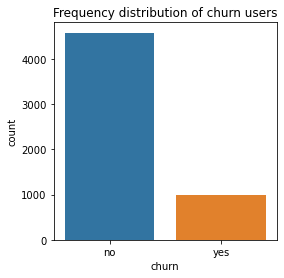

In [748]:
plt.figure(figsize=(4,4))
plt.title('Frequency distribution of churn users')
sns.countplot(data=user_account_df, x='churn')

In [749]:
user_account_df.head()

,user_id,account_start_date,churn_count,churn_period,active_period,active_count,account_age_in_days,churn,avg_equity_active,stddev_equity_active,avg_active_days,avg_churn_days
0,0012db34aa7b083f5714e7831195e54d,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no,589.316821,216.414485,366.0,0.0
1,001d6c77dbdb3213cead7673f250bfdc,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no,3195.568351,733.908784,366.0,0.0
2,002e4653171ddc61c3cd30603cd7bd3e,2017-02-16,0,[],"[[2017-02-16 00:00:00, 2017-08-18 00:00:00]]",1,184,no,113.555652,20.178074,184.0,0.0
3,00384fa9be6fdca1b786bae70d78f88f,2017-02-23,0,[],"[[2017-02-23 00:00:00, 2017-08-18 00:00:00]]",1,177,no,449.931554,78.880558,177.0,0.0
4,0042aac295a0d4df88f4b83012778bd4,2016-08-18,0,[],"[[2016-08-18 00:00:00, 2017-08-18 00:00:00]]",1,366,no,1511.317778,958.210520,366.0,0.0


In [750]:
user_account_df.shape

(5584, 12)

In [751]:
user_account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               5584 non-null   object        
 1   account_start_date    5584 non-null   datetime64[ns]
 2   churn_count           5584 non-null   int64         
 3   churn_period          5584 non-null   object        
 4   active_period         5584 non-null   object        
 5   active_count          5584 non-null   int64         
 6   account_age_in_days   5584 non-null   int64         
 7   churn                 5584 non-null   object        
 8   avg_equity_active     5584 non-null   float64       
 9   stddev_equity_active  5584 non-null   float64       
 10  avg_active_days       5584 non-null   float64       
 11  avg_churn_days        5584 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 523.6+ K

In [752]:
features_df.shape

(5584, 9)

In [753]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   risk_tolerance                5584 non-null   object 
 1   investment_experience         5584 non-null   object 
 2   liquidity_needs               5584 non-null   object 
 3   platform                      5584 non-null   object 
 4   time_spent                    5584 non-null   float64
 5   instrument_type_first_traded  5584 non-null   object 
 6   first_deposit_amount          5584 non-null   float64
 7   time_horizon                  5584 non-null   object 
 8   user_id                       5584 non-null   object 
dtypes: float64(2), object(7)
memory usage: 392.8+ KB


In [754]:
user_account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               5584 non-null   object        
 1   account_start_date    5584 non-null   datetime64[ns]
 2   churn_count           5584 non-null   int64         
 3   churn_period          5584 non-null   object        
 4   active_period         5584 non-null   object        
 5   active_count          5584 non-null   int64         
 6   account_age_in_days   5584 non-null   int64         
 7   churn                 5584 non-null   object        
 8   avg_equity_active     5584 non-null   float64       
 9   stddev_equity_active  5584 non-null   float64       
 10  avg_active_days       5584 non-null   float64       
 11  avg_churn_days        5584 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 523.6+ K

In [755]:
final_df.head(20)

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,account_age_in_days,avg_equity_active,churn,churn_rate
0,895044c23edc821881e87da749c01034,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,276,74.571449,no,0.000000
1,458b1d95441ced242949deefe8e4b638,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,366,339.850027,no,0.000000
2,c7936f653d293479e034865db9bb932f,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,366,47.920656,no,0.000000
3,b255d4bd6c9ba194d3a350b3e76c6393,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,205,180.172780,no,0.000000
4,4a168225e89375b8de605cbc0977ae91,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,365,200.744915,no,0.000000
5,0322b1d744cc89ebbe6ebe70d824d922,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,248,369.083571,yes,0.657258
6,f4cac8c1544b723ddedc9bdba81c64c0,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,365,352.146037,yes,0.090411
7,bdc39d2fc664ef9a5e6713168057f892,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,1.000000,stock,100.0,short_time_horizon,165,1033.104273,no,0.000000
8,85f2f0f54411b4f3e7a403ba902e7280,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,1.000000,stock,5000.0,short_time_horizon,367,7229.592756,no,0.000000
9,529ddd19dac72d55cde8e633340a9aed,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,248,75.275544,no,0.000000


In [756]:
final_df = pd.merge(features_df[['user_id',
                                 'risk_tolerance',
                                 'investment_experience',
                                 'liquidity_needs',
                                 'platform',
                                 'time_spent',
                                 'instrument_type_first_traded',
                                 'first_deposit_amount',
                                 'time_horizon']], 
                    user_account_df[['user_id',
                                     'account_age_in_days', 
                                     'churn_count',
                                     'avg_churn_days', 
                                     'active_count',
                                     'avg_active_days',
                                     'avg_equity_active',
                                     'stddev_equity_active',
                                     'churn']], 
                    how='inner', 
                    on='user_id')
final_df.head()

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,account_age_in_days,churn_count,avg_churn_days,active_count,avg_active_days,avg_equity_active,stddev_equity_active,churn
0,895044c23edc821881e87da749c01034,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,276,0,0.0,1,276.0,74.571449,16.531910,no
1,458b1d95441ced242949deefe8e4b638,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,366,0,0.0,1,366.0,339.850027,66.067198,no
2,c7936f653d293479e034865db9bb932f,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,366,0,0.0,1,366.0,47.920656,7.165874,no
3,b255d4bd6c9ba194d3a350b3e76c6393,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,205,0,0.0,1,205.0,180.172780,32.443320,no
4,4a168225e89375b8de605cbc0977ae91,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,365,0,0.0,1,365.0,200.744915,146.668544,no


In [757]:
print(f'Number of observations in the final dataframe: {final_df.shape[0]}')
print(f'Number of features in the final dataframe: {final_df.shape[1]}')

Number of observations in the final dataframe: 5584
Number of features in the final dataframe: 17


In [758]:
# Check for any missing values in the final dataframe after merging
final_df.isna().sum()

user_id                         0
risk_tolerance                  0
investment_experience           0
liquidity_needs                 0
platform                        0
time_spent                      0
instrument_type_first_traded    0
first_deposit_amount            0
time_horizon                    0
account_age_in_days             0
churn_count                     0
avg_churn_days                  0
active_count                    0
avg_active_days                 0
avg_equity_active               0
stddev_equity_active            0
churn                           0
dtype: int64

In [759]:
print('Are there any duplicate rows in the final dataframe after merging: {}'.\
      format(len(final_df[final_df.duplicated()])))

Are there any duplicate rows in the final dataframe after merging: 0


In [760]:
final_df.to_csv('final_merged_df_updated.csv', index=False)

## 1.2 Bivariate Analysis

In [728]:
final_df = pd.read_csv('final_merged_df_updated.csv')

In [729]:
final_df.shape

(5584, 17)

In [730]:
final_df.head(20)

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,account_age_in_days,churn_count,avg_churn_days,active_count,avg_active_days,avg_equity_active,stddev_equity_active,churn
0,895044c23edc821881e87da749c01034,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,276,0,0.0,1,276.0,74.571449,16.531910,no
1,458b1d95441ced242949deefe8e4b638,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,366,0,0.0,1,366.0,339.850027,66.067198,no
2,c7936f653d293479e034865db9bb932f,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,366,0,0.0,1,366.0,47.920656,7.165874,no
3,b255d4bd6c9ba194d3a350b3e76c6393,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,205,0,0.0,1,205.0,180.172780,32.443320,no
4,4a168225e89375b8de605cbc0977ae91,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,365,0,0.0,1,365.0,200.744915,146.668544,no
5,0322b1d744cc89ebbe6ebe70d824d922,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,248,1,163.0,1,85.0,369.083571,277.229445,yes
6,f4cac8c1544b723ddedc9bdba81c64c0,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,365,1,33.0,2,166.0,352.146037,344.554991,yes
7,bdc39d2fc664ef9a5e6713168057f892,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.000000,stock,100.0,short_time_horizon,165,0,0.0,1,165.0,1033.104273,247.628902,no
8,85f2f0f54411b4f3e7a403ba902e7280,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,5000.0,short_time_horizon,367,0,0.0,1,367.0,7229.592756,1447.270468,no
9,529ddd19dac72d55cde8e633340a9aed,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,2.969617,stock,11.0,med_time_horizon,248,0,0.0,1,248.0,75.275544,51.180664,no


In [731]:
final_df[final_df['churn_count'] > 1].head(20)

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,account_age_in_days,churn_count,avg_churn_days,active_count,avg_active_days,avg_equity_active,stddev_equity_active,churn
89,4e0972689a7ee96f2146d55ff06d6512,med_risk_tolerance,no_investment_exp,very_important_liq_need,both,48.747700,stock,2000.0,short_time_horizon,365,2,115.000000,2,67.500000,1774.236609,316.449948,yes
123,e208d86a4fffbe9e12977e0646d87c24,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,66.362450,stock,500.0,short_time_horizon,228,2,94.500000,2,19.500000,703.999615,350.666837,yes
186,ee1209d1025e38c5ac9220ab5dfa6a01,low_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,6.218200,stock,20.0,short_time_horizon,242,2,76.500000,2,44.500000,72.653785,25.256672,yes
241,56049016e7e3bb7bb51c73a04c0ac121,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.000000,stock,200.0,long_time_horizon,276,2,101.000000,2,37.000000,801.875905,333.271006,yes
361,5b284610a2d273aaee00e38779136101,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,9.489817,mlp,25.0,long_time_horizon,256,2,97.000000,2,31.000000,137.167571,33.522861,yes
504,9b6529a0e567d407ea23726c972c53a1,low_risk_tolerance,no_investment_exp,very_important_liq_need,both,13.838833,stock,100.0,short_time_horizon,367,2,93.500000,2,90.000000,233.929576,105.526021,yes
544,70ada64c4dfb1c864e7801809c679854,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,6.715783,etp,1.0,short_time_horizon,365,2,111.000000,2,71.500000,1987.484234,944.751970,yes
684,93d20035f76020c6979ac3f9596fe6cd,low_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,29.605400,stock,42.0,short_time_horizon,365,2,43.000000,2,139.500000,744.311774,275.983672,yes
752,6746630cf50558c45a2356a8668dc58d,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,2.736000,stock,500.0,long_time_horizon,366,2,85.500000,2,97.500000,632.668236,169.515303,yes
764,570847a47a671f85e20d621db8473c43,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,20.374683,mlp,10.0,short_time_horizon,319,2,144.000000,2,15.500000,35.703596,2.647730,yes


<Axes: xlabel='risk_tolerance', ylabel='count'>

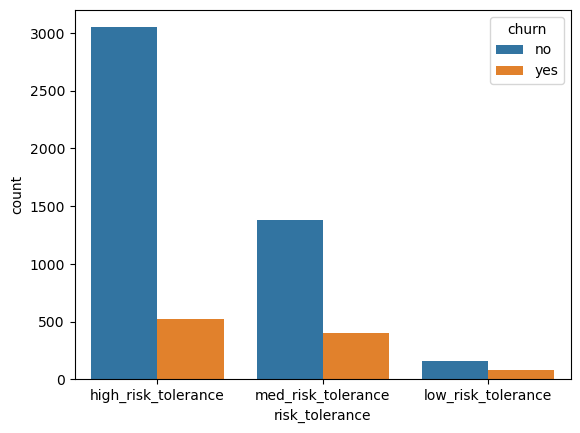

In [732]:
sns.countplot(x='risk_tolerance', hue='churn', data=final_df)

<Axes: xlabel='investment_experience', ylabel='count'>

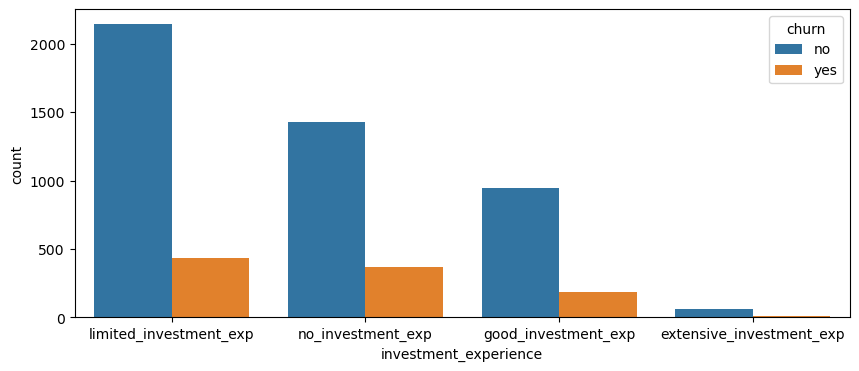

In [733]:
plt.figure(figsize=(10,4))
sns.countplot(x='investment_experience', hue='churn', data=final_df)

<Axes: xlabel='liquidity_needs', ylabel='count'>

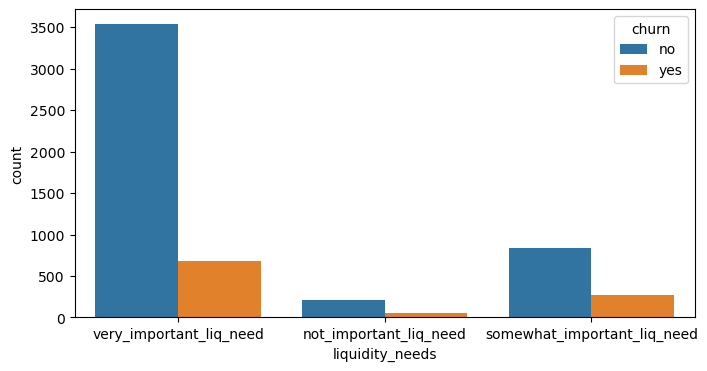

In [734]:
plt.figure(figsize=(8,4))
sns.countplot(x='liquidity_needs', hue='churn', data=final_df)

<Axes: xlabel='platform', ylabel='count'>

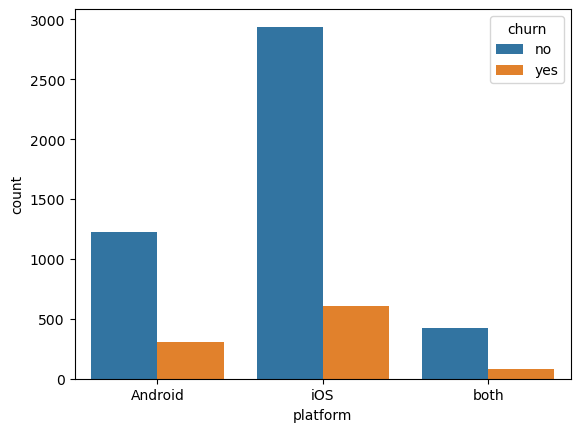

In [735]:
sns.countplot(x='platform', hue='churn', data=final_df)

<Axes: xlabel='instrument_type_first_traded', ylabel='count'>

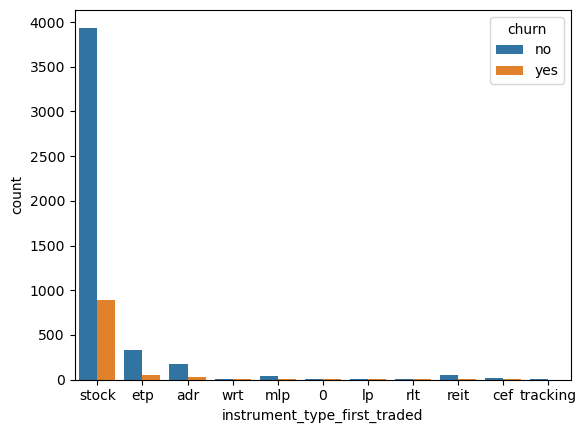

In [736]:
sns.countplot(x='instrument_type_first_traded', hue='churn', data=final_df)

<Axes: xlabel='time_horizon', ylabel='count'>

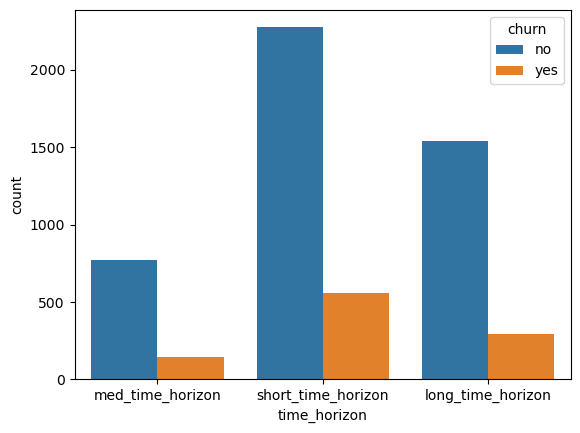

In [737]:
sns.countplot(x='time_horizon', hue='churn', data=final_df)

<Axes: xlabel='churn', ylabel='time_spent'>

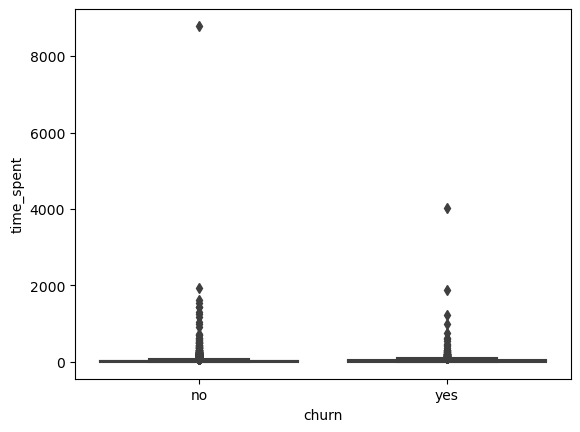

In [738]:
sns.boxplot(x='churn',y='time_spent',data=final_df)

<Axes: >

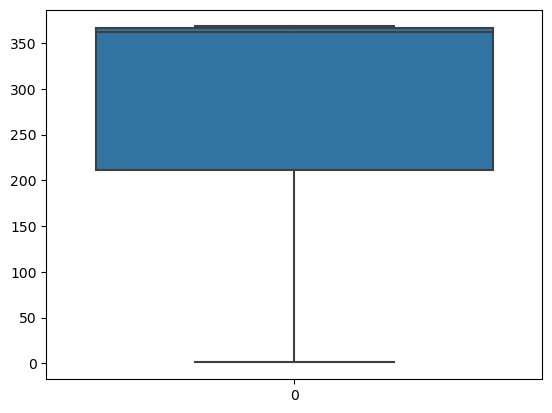

In [739]:
sns.boxplot(data=final_df['avg_active_days'])

<Axes: xlabel='churn', ylabel='time_spent'>

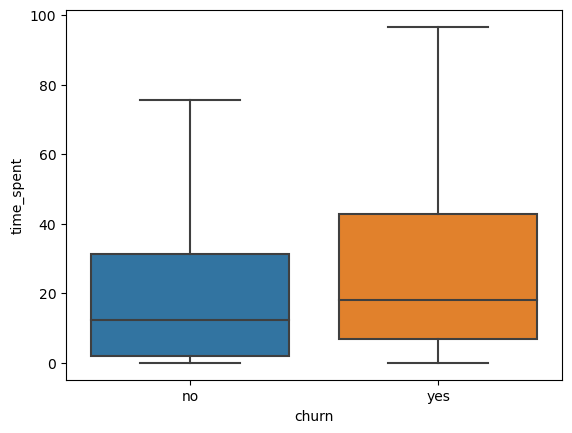

In [740]:
sns.boxplot(x='churn',y='time_spent',data=final_df, showfliers=False)

<Axes: xlabel='churn', ylabel='first_deposit_amount'>

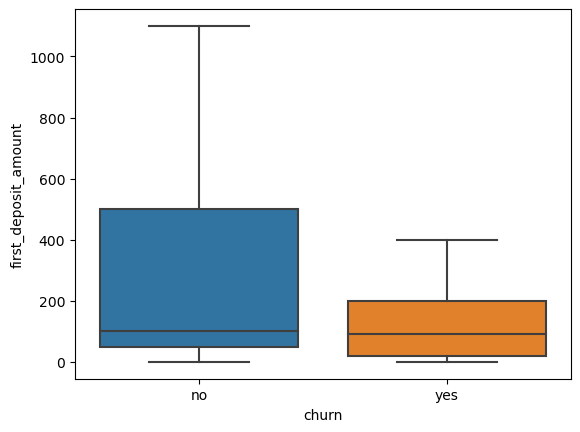

In [741]:
sns.boxplot(x='churn',y='first_deposit_amount',data=final_df, showfliers=False)

<Axes: xlabel='churn', ylabel='account_age_in_days'>

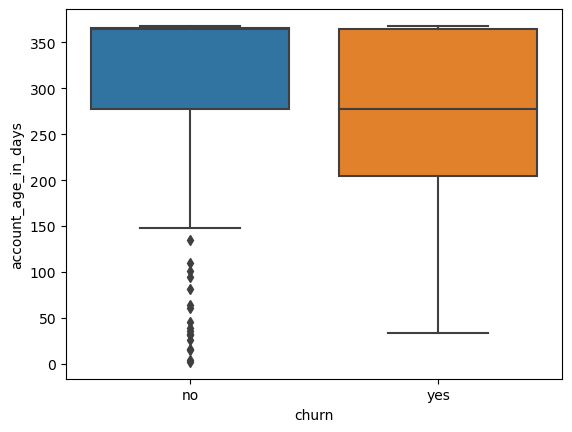

In [742]:
sns.boxplot(x='churn',y='account_age_in_days',data=final_df)

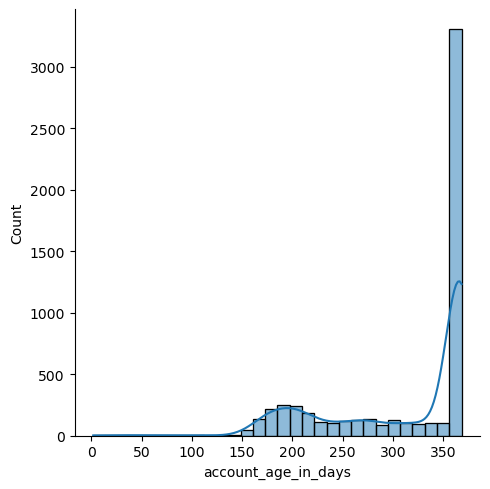

In [743]:
#sns.barplot(x='account_age_in_days', data=final_df)
sns.displot(final_df['account_age_in_days'], kde=True)

<Axes: xlabel='churn', ylabel='avg_active_days'>

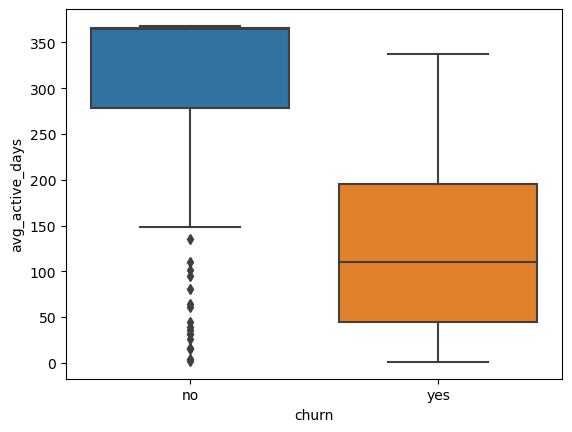

In [744]:
sns.boxplot(x='churn',y='avg_active_days',data=final_df)

<Axes: xlabel='churn', ylabel='avg_churn_days'>

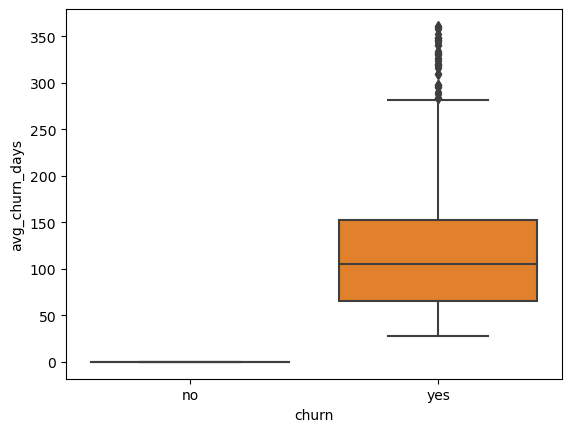

In [745]:
sns.boxplot(x='churn',y='avg_churn_days',data=final_df)

In [746]:
final_df.describe()

,time_spent,first_deposit_amount,account_age_in_days,churn_count,avg_churn_days,active_count,avg_active_days,avg_equity_active,stddev_equity_active
count,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000,5584.000000
mean,34.509706,633.566805,314.202364,0.201289,20.543786,1.057307,286.907504,3314.510644,1348.526956
std,155.080551,2118.323263,72.708255,0.458125,52.209147,0.266884,105.407785,10870.365762,4448.563449
min,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,9.377857,0.000000
25%,2.848908,50.000000,256.000000,0.000000,0.000000,1.000000,211.000000,110.670499,32.842087
50%,13.474708,100.000000,365.000000,0.000000,0.000000,1.000000,362.000000,520.974327,197.905066
75%,33.823829,500.000000,366.000000,0.000000,0.000000,1.000000,366.000000,2176.481150,886.313435
max,8788.329450,50000.000000,368.000000,3.000000,361.000000,4.000000,368.000000,310114.748930,128800.801350


<Axes: xlabel='churn', ylabel='avg_equity_active'>

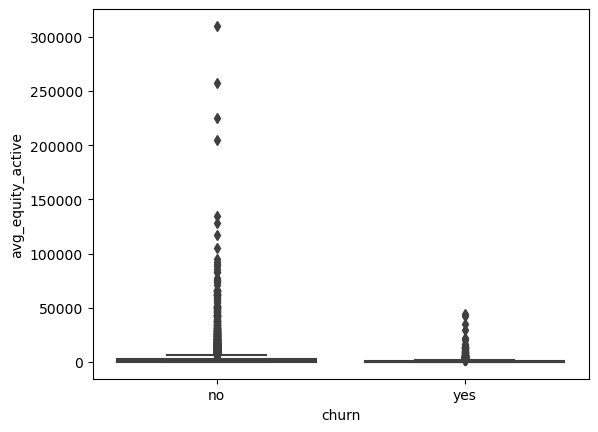

In [747]:
sns.boxplot(x='churn',y='avg_equity_active',data=final_df)

<Axes: xlabel='churn', ylabel='stddev_equity_active'>

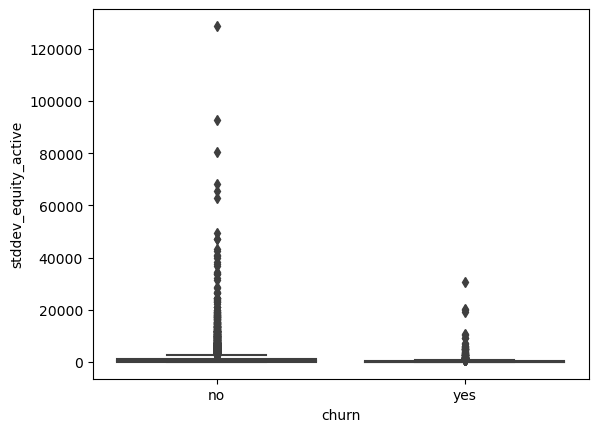

In [748]:
sns.boxplot(x='churn',y='stddev_equity_active',data=final_df)

<Axes: xlabel='churn', ylabel='avg_equity_active'>

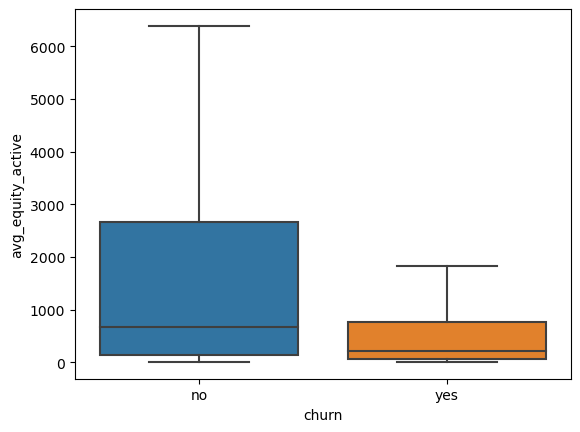

In [749]:
sns.boxplot(x='churn',y='avg_equity_active',data=final_df, showfliers=False)

<Axes: xlabel='churn', ylabel='stddev_equity_active'>

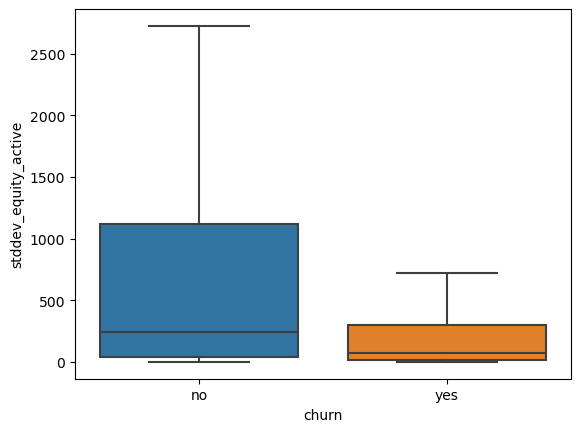

In [750]:
sns.boxplot(x='churn',y='stddev_equity_active',data=final_df, showfliers=False)

Since there is high correlation between account_age_in_days and avg_active_days, we drop one of the variables. The same thing is true wrt variables: avg_equity_active and stddev_equity_active, avg_churn_days and churn_count, churn_count and avg_active_days.

<Axes: >

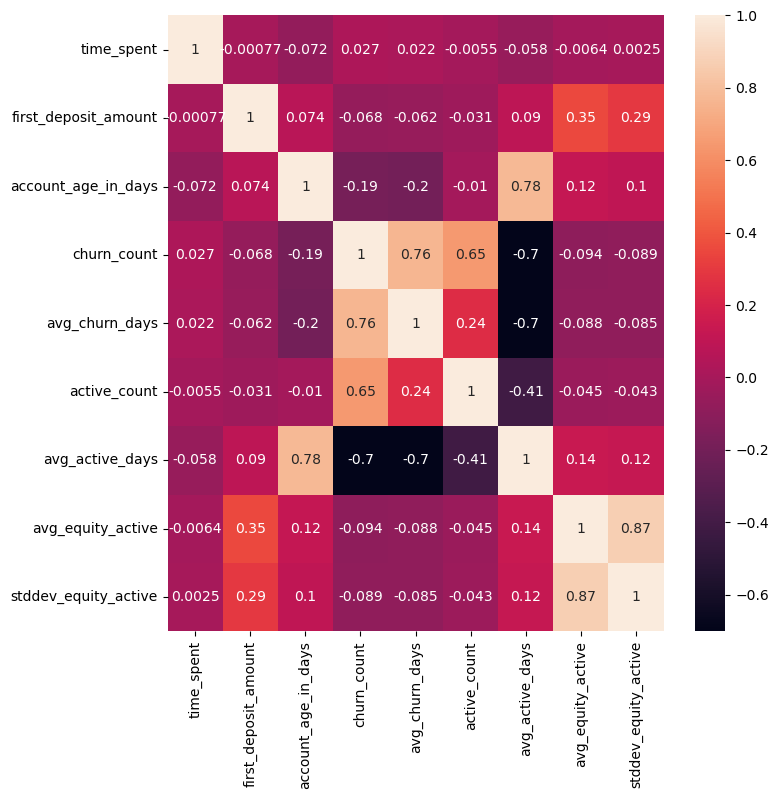

In [751]:
plt.figure(figsize=(8,8))
sns.heatmap(final_df.corr(), annot=True)

In [752]:
final_df.drop(['account_age_in_days',
               'stddev_equity_active',
               'active_count',
              ],
              axis=1, 
              inplace=True)

<Axes: >

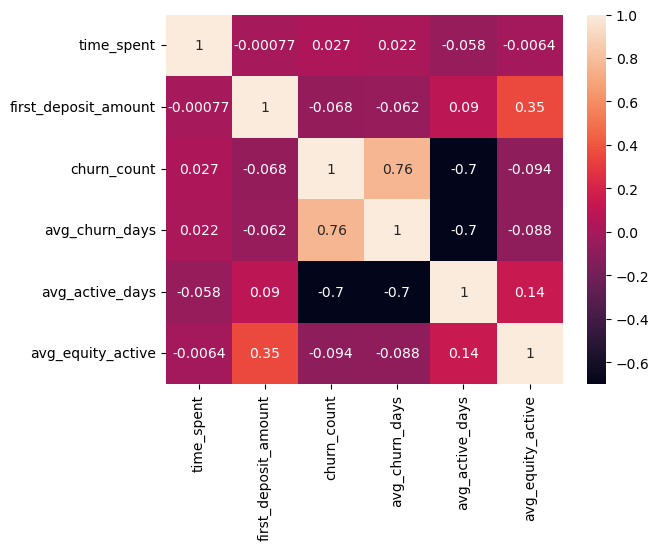

In [753]:
sns.heatmap(final_df.corr(), annot=True)

In [754]:
final_df.drop(['avg_churn_days',
               'churn_count'
              ],
              axis=1, 
              inplace=True)

<Axes: >

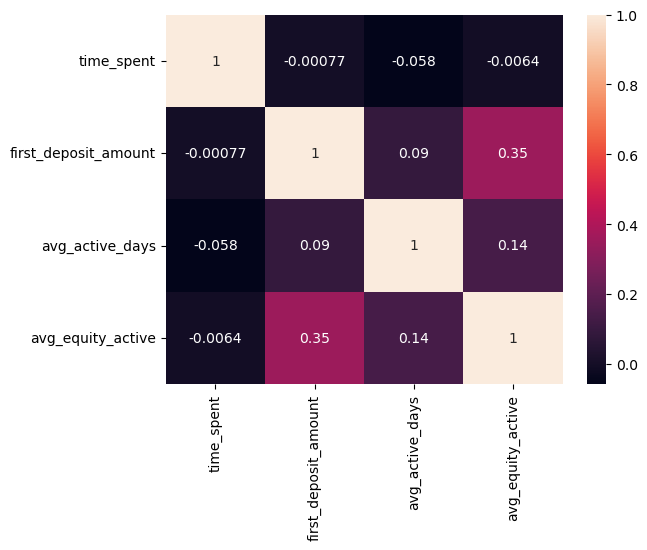

In [755]:
sns.heatmap(final_df.corr(), annot=True)

In [756]:
#As churn count and avg active days are important to predict whether the user is going to churn or not, we are not dropping one of the variables inspite of high correlation.

In [757]:
final_df[final_df['churn'] == 'yes']

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,avg_active_days,avg_equity_active,churn
5,0322b1d744cc89ebbe6ebe70d824d922,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,12.968117,stock,100.0,med_time_horizon,85.0,369.083571,yes
6,f4cac8c1544b723ddedc9bdba81c64c0,low_risk_tolerance,good_investment_exp,very_important_liq_need,Android,30.710083,stock,5.0,long_time_horizon,166.0,352.146037,yes
12,b63f1ab8005b313815f116ea99ae1864,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,74.346767,stock,200.0,short_time_horizon,112.0,367.042579,yes
21,3d8664d2b058d4796589a4dbedcc1a48,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.549667,stock,10.0,short_time_horizon,44.0,10.495781,yes
32,209cbf0d52efd985e9a15aad05ee1e3a,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,17.973450,stock,100.0,short_time_horizon,112.0,112.204686,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5562,42d770c7fd58e1a3c93ff190cab9cbdc,med_risk_tolerance,limited_investment_exp,not_important_liq_need,iOS,15.122067,stock,100.0,short_time_horizon,42.5,854.637143,yes
5566,193b7e9382043cce5ae965268ec47879,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,27.200983,stock,30.0,short_time_horizon,124.5,87.703936,yes
5571,f415b4e8c761affcae0925dff482a12b,med_risk_tolerance,extensive_investment_exp,very_important_liq_need,iOS,0.000000,stock,60.0,short_time_horizon,328.0,173.846620,yes
5578,abc394015ddbf4a8c641f65fb401ba0d,med_risk_tolerance,no_investment_exp,not_important_liq_need,iOS,13.606267,stock,10.0,short_time_horizon,11.0,10.254682,yes


In [758]:
final_df[final_df['time_spent'] == 0]

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,avg_active_days,avg_equity_active,churn
7,bdc39d2fc664ef9a5e6713168057f892,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,iOS,0.0,stock,100.0,short_time_horizon,165.0,1033.104273,no
8,85f2f0f54411b4f3e7a403ba902e7280,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.0,stock,5000.0,short_time_horizon,367.0,7229.592756,no
16,50cf51b304d3dd9796063cf7b8221ada,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,0.0,stock,40.0,short_time_horizon,367.0,21.545763,no
18,bb70182208e73de1dccc347d098b4292,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,0.0,stock,150.0,short_time_horizon,367.0,3179.990297,no
19,44daa41022383125d36277779c8e8f85,low_risk_tolerance,no_investment_exp,very_important_liq_need,both,0.0,stock,50.0,med_time_horizon,367.0,26.371308,no
...,...,...,...,...,...,...,...,...,...,...,...,...
5555,86037cc704cedba79b00a71d0c74fcbd,high_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,0.0,stock,20.0,short_time_horizon,367.0,43.948234,no
5557,39da635fce1ef178f00c06163c2575b3,med_risk_tolerance,no_investment_exp,very_important_liq_need,iOS,0.0,stock,100.0,long_time_horizon,253.0,66.208384,yes
5561,42c4d3fdd3c0024a115e2324cc18090e,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,0.0,adr,100.0,long_time_horizon,367.0,120.735041,no
5569,51e2fd5633503daa72d6d9b971ead099,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,0.0,stock,100.0,med_time_horizon,366.0,943.202070,no


In [759]:
final_df[final_df['first_deposit_amount'] == 0]

,user_id,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,avg_active_days,avg_equity_active,churn
2474,29e29b170d4844397590e511100e1457,med_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,13.566850,stock,0.0,short_time_horizon,81.5,5935.881210,yes
3377,5eb7e5244d0e33ce744fbe2d530b9c75,med_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,36.394150,stock,0.0,med_time_horizon,22.0,9.706759,yes
4930,147251e571c44cd4c412bd453329d007,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,63.223983,mlp,0.0,med_time_horizon,49.0,9.979592,yes
5373,0e469b74e2911549005bb6160074735a,med_risk_tolerance,good_investment_exp,very_important_liq_need,Android,46.916067,stock,0.0,short_time_horizon,169.0,9.974142,yes


<Axes: >

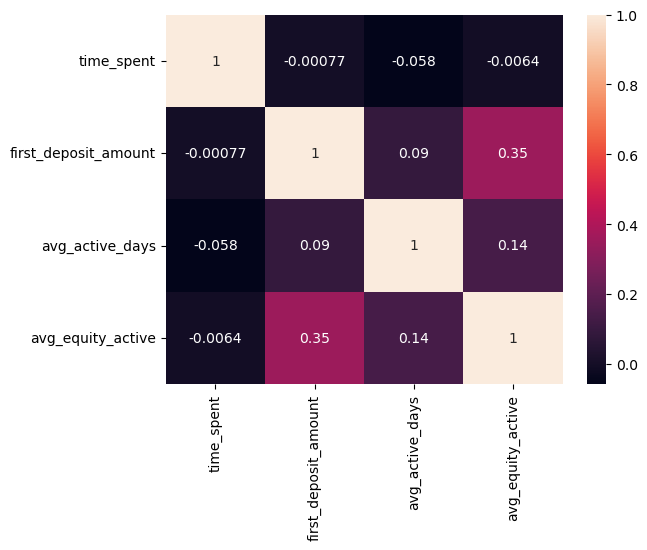

In [760]:
sns.heatmap(final_df.corr(), annot=True)

In [761]:
final_df.describe()

,time_spent,first_deposit_amount,avg_active_days,avg_equity_active
count,5584.000000,5584.000000,5584.000000,5584.000000
mean,34.509706,633.566805,286.907504,3314.510644
std,155.080551,2118.323263,105.407785,10870.365762
min,0.000000,0.000000,1.000000,9.377857
25%,2.848908,50.000000,211.000000,110.670499
50%,13.474708,100.000000,362.000000,520.974327
75%,33.823829,500.000000,366.000000,2176.481150
max,8788.329450,50000.000000,368.000000,310114.748930


In [762]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       5584 non-null   object 
 1   risk_tolerance                5584 non-null   object 
 2   investment_experience         5584 non-null   object 
 3   liquidity_needs               5584 non-null   object 
 4   platform                      5584 non-null   object 
 5   time_spent                    5584 non-null   float64
 6   instrument_type_first_traded  5584 non-null   object 
 7   first_deposit_amount          5584 non-null   float64
 8   time_horizon                  5584 non-null   object 
 9   avg_active_days               5584 non-null   float64
 10  avg_equity_active             5584 non-null   float64
 11  churn                         5584 non-null   object 
dtypes: float64(4), object(8)
memory usage: 523.6+ KB


## 2. Data preparation for modelling

For non-ordinal categorical variables with multiple levels, create dummy features (one-hot encoded)

In [952]:
modelling_data = final_df.copy()
churn_mapping = {'yes': 1, 'no': 0}
modelling_data['churn'] = modelling_data['churn'].map(churn_mapping)

In [953]:
modelling_data['churn'].value_counts(normalize=True)

0    0.821275
1    0.178725
Name: churn, dtype: float64

In [954]:
modelling_data.shape

(5584, 12)

In [982]:
class ChurnPredictor:
    def __init__(self, 
                 continuous_vars=[],
                 continuous_skewed_vars=[],
                 ordinal_vars=[],
                 category_order=[],
                 nominal_vars=[],
                 apply_smote = False
                ):
        
        # Input and output features
        self.continuous_vars           = continuous_vars
        self.continuous_skewed_vars    = continuous_skewed_vars
        self.ordinal_vars              = ordinal_vars
        self.category_order            = category_order
        self.nominal_vars              = nominal_vars
        self.apply_smote               = apply_smote        
        self.preprocessor              = None
        self.transformed_feature_names = None
        self.models                    = {}
        self.model_hyper_params        = {}
        self.X_test_transformed        = {}
        self.y_test                    = {}
        
    def initialize_preprocessor(self, feature_names):

        # Define the transformers for each type of feature.

        # Natural logarithm cannot handle zero or negative values.
        # Using log1p will take care of this automatically.
        log_transformer_and_scaler = Pipeline(steps=[
            ('log_transformer', FunctionTransformer(np.log1p)),
            ('scaler', RobustScaler())            
        ])

        
        scaler = Pipeline(steps=[
            ('scaler', RobustScaler())           
        ])
        
        ordinal_categorical_transformer = Pipeline(steps=[
            ('ordinal_encoder', OrdinalEncoder(categories=self.category_order, 
                                               dtype=int))])

        nominal_categorical_transformer = Pipeline(steps=[
            ('nominal_encoder', OneHotEncoder())])

        
        # Create the ColumnTransformer
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('log_transform_scaler_continuous', log_transformer_and_scaler, 
                     self.get_indices(self.continuous_skewed_vars, feature_names)),
                ('scaling_numeric_continuous', scaler, 
                     self.get_indices(self.continuous_vars, feature_names)),
                ('ordinal_categorical', ordinal_categorical_transformer,
                     self.get_indices(self.ordinal_vars, feature_names)),
                ('nominal_categorical', nominal_categorical_transformer, 
                     self.get_indices(self.nominal_vars, feature_names)),
            ],
            remainder='passthrough',
        )

        #self.preprocessor.set_output(transform='pandas')
       
    def get_indices(self, feature_names, all_feature_names):
        return [all_feature_names.index(feature_name) for feature_name in feature_names]

    def get_index(self, feature_name):
        if isinstance(feature_name, int):
            return feature_name
        elif isinstance(feature_name, str):
            if hasattr(self, 'feature_names'):
                return self.feature_names.index(feature_name)
            else:
                raise ValueError("Feature names are not set")
        else:
            raise ValueError(f"Invalid feature name type: {type(feature_name)}")

    def evaluate_binary_classification(self, 
                                       y_true, 
                                       y_pred):
        
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        return precision, recall, f1

    def add_logistic_regression_model(self, model_name='Logistic Regression', 
                                      prob_threshold = 0.5, class_weight=None, **kwargs):

        self.model_hyper_params[model_name] = None
        self.prob_threshold = prob_threshold
        model = LogisticRegression(class_weight=None, **kwargs)
        self.models[model_name] = model

    def add_random_forest_model(self, model_name='Random Forest', 
                                class_weight=None, **kwargs):
       
        self.model_hyper_params[model_name] = None          
        model = RandomForestClassifier(class_weight=None, **kwargs)
        self.models[model_name] = model

    def add_decision_tree_model(self, model_name='Decision Tree',
                                class_weight=None, **kwargs):
        self.model_hyper_params[model_name] = None                  
        model = DecisionTreeClassifier(class_weight=None, **kwargs)
        self.models[model_name] = model

    def add_decision_tree_tune_model(self, model_name='Decision Tree Tuning',
                                     class_weight=None, **kwargs):

        if self.model_hyper_params[model_name] == None:
            raise ValueError("Hyper params are are not set")
            return
        
        scoring = make_scorer(f1_score)
        random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight=class_weight, 
                                                                            **kwargs), 
                                           param_distributions=self.model_hyper_params[model_name],
                                           scoring=scoring,
                                           n_iter=700, 
                                           cv=5, 
                                           refit="f1-score",
                                           random_state=42)
        self.models[model_name] = random_search

    def add_random_forest_tune_model(self, model_name='Random Forest Tuning',
                                     class_weight=None, **kwargs):

        if self.model_hyper_params[model_name] == None:
            raise ValueError("Hyper params are are not set")
            return
        
        scoring = make_scorer(f1_score)
        random_search = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight=class_weight,
                                                                            warm_start = True,
                                                                            **kwargs), 
                                           param_distributions=self.model_hyper_params[model_name],
                                           scoring=scoring,
                                           n_iter=100, 
                                           cv=5, 
                                           refit="f1-score",
                                           random_state=42)
        self.models[model_name] = random_search
        
    def fit_and_evaluate(self, X, y):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y,
                                                            test_size=0.2,
                                                            stratify=y,
                                                            random_state=42)
                
        if self.apply_smote:
            X_train_org = X_train.copy()
            y_train_org = y_train.copy()
            
            smote = SMOTE(random_state=100)
            X_train, y_train = smote.fit_resample(X_train_org, y_train_org)            
        
        # Train distribution
        print(f'Train Distribution')
        print('******************************')
        print(y_train.value_counts(normalize=True))
        print(f'Test Distribution')
        print('******************************')
        
        print(y_test.value_counts(normalize=True))
        
        feature_names = self.get_feature_names(X_train)  # Get the feature names
        self.initialize_preprocessor(feature_names)  # Initialize the preprocessor 
        print(f'Feature names : {feature_names}')
        
        # Apply required transformed to the input features
        self.preprocessor.fit(X_train)
        X_train_transformed = self.preprocessor.transform(X_train)
        X_test_transformed = self.preprocessor.transform(X_test)
        
        # Used for prediction purpose
        self.X_test_transformed = X_test_transformed
        self.y_test = y_test
        
        # After applying all the transformations, update the transformed feature names
        self.update_transformed_feature_names(feature_names)
        
        results = {}
        final_models  = {}
        for model_name, model in self.models.items():   
            #print(X_train_transformed.shape)

            # Save the best estimator after tuning
            if self.model_hyper_params[model_name] != None:
                print(f'Performing random search for obtaining best hyperparams for {model_name}')
                model.fit(X_train_transformed, y_train)
                self.models[model_name] = model.best_estimator_
                model = self.models[model_name]
                print('Best model obtained from hyperparam tuning')
                print(f'******************************{model_name}*****************************')
                print(model.get_params())
                print('****************************************************************************')
                
            else:
                print(f'Performing fit for {model_name}')                
                model.fit(X_train_transformed, y_train)
                
            if 'prob' in model_name: # Only applicable for probabilistic models
                y_prob = model.predict_proba(X_test_transformed)[:, 1]
                y_pred = np.where(y_prob > 0.35, 1, 0)
            else:
                y_pred = model.predict(X_test_transformed)

            print(f'******************************{model_name}*****************************')
            print(model.get_params())
            print('****************************************************************************')
            precision, recall, f1 = self.evaluate_binary_classification(y_test,
                                                                        y_pred)
            results[model_name] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
            final_models[model_name] = model
            
        return final_models, results
    
    def predict(self, model_name):
        y_test_pred = self.models[model_name].predict(self.X_test_transformed)

        return self.y_test, y_test_pred
    
    def get_feature_names(self, X):
        if isinstance(X, pd.DataFrame):
            return X.columns.tolist()
        elif isinstance(X, np.ndarray):
            return [f'feature_{i}' for i in range(X.shape[1])]
        else:
            raise ValueError("Unsupported data type for getting feature names")    
            
    def update_transformed_feature_names(self, org_feature_names):
        # Get the feature names for the transformed columns
        transformed_feature_names = []
        
        # Get feature names for log_transform_scaler_continuous columns
        log_transform_indices = self.get_indices(self.continuous_skewed_vars, 
                                                 org_feature_names)
        for idx in log_transform_indices:
            transformed_feature_names.append(org_feature_names[idx] + '_log')

        # Get feature names for the remaining transformers
        for name, transformer in self.preprocessor.named_transformers_.items():
            if name != 'log_transform_scaler_continuous':
                if hasattr(transformer, 'get_feature_names_out'):
                    names = transformer.get_feature_names_out()
                    transformed_feature_names.extend(names)
                    
        # Get the original column names that were not transformed
        remainder_columns = [name for name in org_feature_names if (name not in transformed_feature_names and
                                                                name not in self.nominal_vars and
                                                                name not in self.continuous_skewed_vars)]

        # Combine transformed feature names and remainder column names to get final feature names
        self.transformed_feature_names = transformed_feature_names + remainder_columns
        
        
    def set_model_hyper_params(self, model_name, hyper_params):
        self.model_hyper_params[model_name] = hyper_params

In [983]:
# Assigning all model feature variables to X
X = modelling_data.drop(['churn','user_id'], axis=1)
X.head()

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,avg_active_days,avg_equity_active
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,276.0,74.571449
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,366.0,339.850027
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,366.0,47.920656
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,205.0,180.172780
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,365.0,200.744915


In [984]:
# Assigning response variable to y
y = modelling_data['churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

## Question a) What percentage of users have churned in the dataset?

In [985]:
y.value_counts(normalize=True)

0    0.821275
1    0.178725
Name: churn, dtype: float64

### Around 18% of users have churned in the dataset.

In [986]:
# Numeric continuous features
continuous_vars        = ['avg_active_days']

continuous_skewed_vars = ['time_spent',
                          'first_deposit_amount', 
                          'avg_equity_active',
                         ]

# Discrete features
#discrete_vars          = ['churn_count']


# Categorical features
ordinal_vars           = ['risk_tolerance',
                          'investment_experience',
                          'liquidity_needs',
                          'time_horizon',
                         ]
nominal_vars           = ['platform',
                          'instrument_type_first_traded',
                         ]

# Target variable
#target_var             = ['churn']

# Defining the order for ordinal categorical features
category_order = [
    # risk_tolerance order
    ['low_risk_tolerance', 'med_risk_tolerance', 'high_risk_tolerance'],
    # investment_experience order
    ['no_investment_exp', 'limited_investment_exp', 'good_investment_exp', 'extensive_investment_exp'],
    # liquidity_needs order
    ['not_important_liq_need', 'somewhat_important_liq_need', 'very_important_liq_need'],
    # time_horizon order
    ['short_time_horizon', 'med_time_horizon', 'long_time_horizon'],
]



In [987]:
# Create an instance of the ChurnPredictor
churn_predictor = ChurnPredictor(continuous_vars=continuous_vars, 
                                 continuous_skewed_vars=continuous_skewed_vars,
                                 ordinal_vars=ordinal_vars, 
                                 category_order=category_order,
                                 nominal_vars=nominal_vars
                                )


In [988]:
# Add Logistic regression base model
churn_predictor.add_logistic_regression_model(model_name = "LR_Base")

# Add Logistic regression with class weights added
churn_predictor.add_logistic_regression_model(model_name = "LR_Class_Weights", 
                                              class_weight='balanced')
# Logistic regression with provided probability threshold
churn_predictor.add_logistic_regression_model(model_name = "LR_Base_prob_change")


# Add Decision Tree model
churn_predictor.add_decision_tree_model(model_name = "DT_Base")
# Add Decision Tree model with class weights
churn_predictor.add_decision_tree_model(model_name = "DT_Class_Weights", 
                                        class_weight='balanced')
# Add Decision Tree model with hyper param tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(5, 40),
    'min_samples_leaf': np.arange(10, 30),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None],
} 

churn_predictor.set_model_hyper_params(model_name = "DT_Hyperparam_tuning",
                                       hyper_params = param_grid)
churn_predictor.add_decision_tree_tune_model(model_name = "DT_Hyperparam_tuning", 
                                             class_weight = 'balanced')

# Add Random Forest model
churn_predictor.add_random_forest_model(model_name = "RF_Base",
                                        n_estimators = 500,
                                        max_depth = 5,
                                        min_samples_leaf = 13,
                                        min_samples_split = 10,
                                        warm_start = True
                                       )
# Add Random Forest model
churn_predictor.add_random_forest_model(model_name = "RF_Class_Weights",
                                        n_estimators = 500,
                                        max_depth = 5,
                                        min_samples_leaf = 13,
                                        min_samples_split = 10,                                        
                                        class_weight = 'balanced_subsample',
                                        warm_start = True
                                       )
# Add Random Forest model with hyper param tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(3, 7),
    'min_samples_split': np.arange(5, 20),
    'min_samples_leaf': np.arange(10, 25),
    'max_features': ['auto', 'sqrt', 'log2', None],
}
churn_predictor.set_model_hyper_params(model_name = "RF_Hyperparam_tuning",
                                       hyper_params = param_grid)
#churn_predictor.add_random_forest_tune_model(model_name = "RF_Hyperparam_tuning", 
#                                             class_weight = 'balanced')

In [989]:
models, results = churn_predictor.fit_and_evaluate(X, y)

Train Distribution
******************************
0    0.821357
1    0.178643
Name: churn, dtype: float64
Test Distribution
******************************
0    0.820949
1    0.179051
Name: churn, dtype: float64
Feature names : ['risk_tolerance', 'investment_experience', 'liquidity_needs', 'platform', 'time_spent', 'instrument_type_first_traded', 'first_deposit_amount', 'time_horizon', 'avg_active_days', 'avg_equity_active']
Performing fit for LR_Base
******************************LR_Base*****************************
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
****************************************************************************
Performing fit for LR_Class_Weights
******************************LR_Class_Weights*****************************
{'C': 1.0, '

## Question b) Build classifier and predict churn

In [990]:
results_df = pd.DataFrame(results).T
results_df

,Precision,Recall,F1-score
LR_Base,0.869565,0.700,0.775623
LR_Class_Weights,0.869565,0.700,0.775623
LR_Base_prob_change,0.738693,0.735,0.736842
DT_Base,0.732057,0.765,0.748166
DT_Class_Weights,0.732394,0.780,0.755448
DT_Hyperparam_tuning,0.757009,0.810,0.782609
RF_Base,0.970803,0.665,0.789318
RF_Class_Weights,0.963768,0.665,0.786982


We see that DT is performing well achieving 78% F1-score, 75% precision and 81% recall. 

In [991]:
y_true, y_pred = churn_predictor.predict('DT_Hyperparam_tuning')

In [996]:
y_test_pred_df = pd.DataFrame({'user_id': modelling_data['user_id'],
                               'predicted_churn': y_true,
                               'actual_churn': y_pred,
                         },
                         index = y_true.index)
y_test_pred_df.set_index('user_id', inplace = True)


In [998]:
y_test_pred_df.head(25)

,predicted_churn,actual_churn
user_id,,
93f3a8436e7338ff3a3a3038088a0c54,1,1
3c8df196d5d762500178ea3385a0ab64,0,0
e95986fb82e06e4140b91a8eb6e206f5,0,0
7902b27f8343f8582f0f1a8085752033,0,0
e303a31d2cf43873773fb48148fce886,0,0
ced0a088efcbc93a68f4afdb51cf9085,0,0
b0f31a685feb4095860d7bd187a7eda4,1,1
52aa3d13e515a30e267c63237ef8951b,1,0
791452b0aa114db17bfbc9f8396a93ba,1,1


### Top 5 important features according to Logistic Regression

In [999]:
coefficients = models['LR_Base'].coef_[0]
# Get the absolute value of the coefficients
absolute_coefficients = np.abs(coefficients)

In [1000]:
# Sort the coefficients in descending order
sorted_indices = np.argsort(absolute_coefficients)[::-1]
sorted_coefficients = absolute_coefficients[sorted_indices]

In [1001]:
feature_names = churn_predictor.transformed_feature_names
#feature_names

In [1002]:
top_five_indices = sorted_indices[:5]

print("Top five important features obtained from LR:")
for feature_idx in top_five_indices:
    feature_name = feature_names[feature_idx]
    coefficient = coefficients[feature_idx]
    print(f"{feature_name}: Coefficient = {coefficient}")

Top five important features obtained from LR:
avg_active_days: Coefficient = -3.8636335540112126
liquidity_needs: Coefficient = 1.112025698158484
instrument_type_first_traded_lp: Coefficient = 1.0102578381885867
platform_Android: Coefficient = -0.5560738233223776
instrument_type_first_traded_rlt: Coefficient = 0.500414876647201


### Top 5 important features according to Random Forest

In [1003]:
print(len(feature_names))

22


In [1004]:
print(len(models['RF_Class_Weights'].feature_importances_))

22


In [1005]:
# Get feature importance
importance = models['RF_Class_Weights'].feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 important features
top_5_features = feature_importance_df.head(5)

# Print the top 5 important features
print(top_5_features)

                    Feature  Importance
3           avg_active_days    0.790446
2     avg_equity_active_log    0.076614
1  first_deposit_amount_log    0.041936
0            time_spent_log    0.040452
4            risk_tolerance    0.021665


## Question c) List Important features

In [1006]:
print(top_5_features)

                    Feature  Importance
3           avg_active_days    0.790446
2     avg_equity_active_log    0.076614
1  first_deposit_amount_log    0.041936
0            time_spent_log    0.040452
4            risk_tolerance    0.021665
